In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
df = pd.read_csv('Merged_HR_Training_Data1.csv')

attrition_by_job_role = df.groupby('JobRole')['Attrition-Label'].value_counts(normalize=True).unstack()

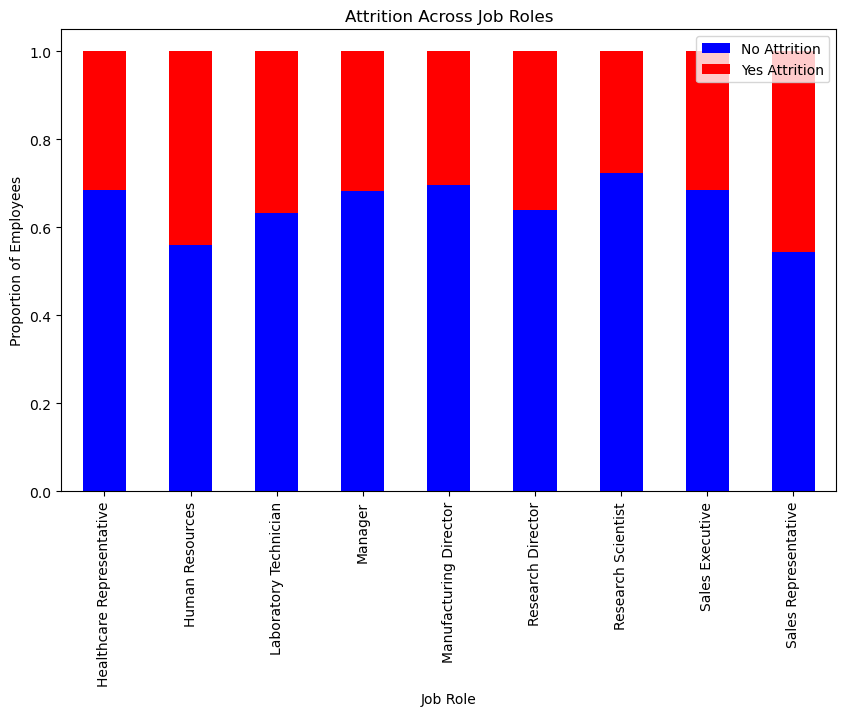

Attrition-Label                  No       Yes
JobRole                                      
Healthcare Representative  0.686007  0.313993
Human Resources            0.560976  0.439024
Laboratory Technician      0.633333  0.366667
Manager                    0.682724  0.317276
Manufacturing Director     0.697009  0.302991
Research Director          0.638643  0.361357
Research Scientist         0.722524  0.277476
Sales Executive            0.684500  0.315500
Sales Representative       0.544808  0.455192


In [53]:
attrition_by_job_role.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'red'])
plt.title('Attrition Across Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Proportion of Employees')
plt.legend(['No Attrition', 'Yes Attrition'], loc='upper right')
plt.show()

print(attrition_by_job_role)

In [76]:
attrition_rate_by_role = df.groupby('JobRole')['Attrition_Binary'].mean()

In [77]:
highest_attrition_role = attrition_rate_by_role.idxmax()
lowest_attrition_role = attrition_rate_by_role.idxmin()

print(f"Job Role with the Highest Attrition: {highest_attrition_role}, Attrition Rate: {attrition_rate_by_role.max()}")
print(f"Job Role with the Lowest Attrition: {lowest_attrition_role}, Attrition Rate: {attrition_rate_by_role.min()}")

Job Role with the Highest Attrition: Sales Representative, Attrition Rate: 0.45519203413940257
Job Role with the Lowest Attrition: Research Scientist, Attrition Rate: 0.27747551686615884


In [78]:
highest_attrition_data = df[df['JobRole'] == highest_attrition_role]

In [79]:
lowest_attrition_data = df[df['JobRole'] == lowest_attrition_role]
comparison_df = pd.DataFrame({
    'Feature': ['MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'PerformanceRating'],
    'Highest Attrition': [highest_attrition_data['MonthlyIncome'].mean(),
                          highest_attrition_data['YearsAtCompany'].mean(),
                          highest_attrition_data['JobSatisfaction'].mean(),
                          highest_attrition_data['PerformanceRating'].mean()],
    'Lowest Attrition': [lowest_attrition_data['MonthlyIncome'].mean(),
                         lowest_attrition_data['YearsAtCompany'].mean(),
                         lowest_attrition_data['JobSatisfaction'].mean(),
                         lowest_attrition_data['PerformanceRating'].mean()]
})


print(comparison_df)

             Feature  Highest Attrition  Lowest Attrition
0      MonthlyIncome        7986.406828       6858.672470
1     YearsAtCompany          16.571835         10.761697
2    JobSatisfaction           2.610242          2.718172
3  PerformanceRating           2.699858          2.946681


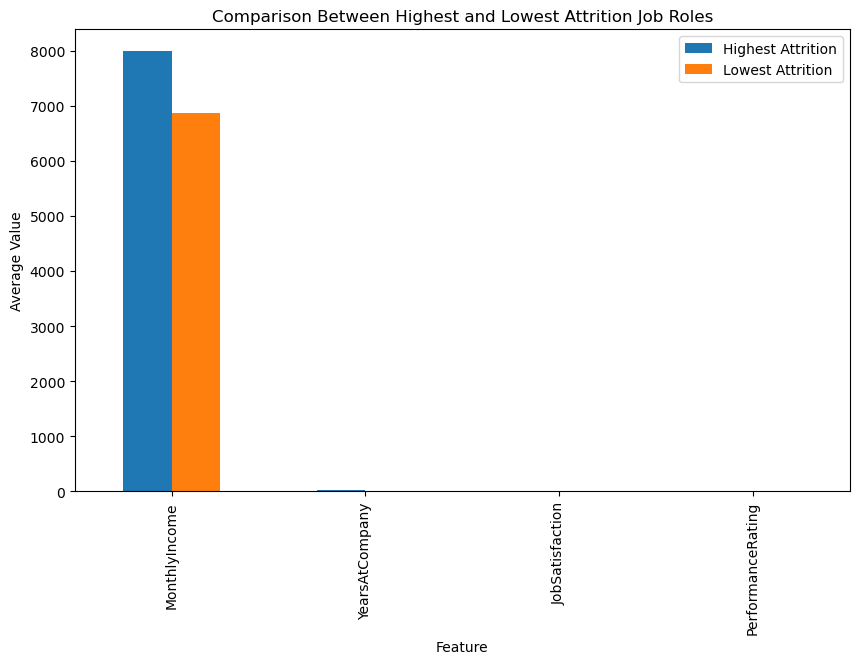

In [80]:
comparison_df.set_index('Feature').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison Between Highest and Lowest Attrition Job Roles')
plt.ylabel('Average Value')
plt.show()

In [95]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
fig = px.bar(df, x='JobRole', y='Attrition-Label', color='Attrition-Label', barmode='group')
fig.show()

In [90]:
import plotly.express as px
import pandas as pd


df['Attrition-Label'] = df['Attrition-Label'].astype(str)


attrition_count_by_jobrole = df.groupby(['JobRole', 'Attrition-Label']).size().reset_index(name='Count')


fig = px.bar(attrition_count_by_jobrole, x='JobRole', y='Count', color='Attrition-Label', barmode='group')
fig.show()


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [97]:
df_encoded = pd.get_dummies(df, columns=['JobRole', 'OverTime'], drop_first=True)
print(df_encoded.columns) 

Logistic Regression Accuracy: 0.64
Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'JobLevel', 'HourlyRate', 'MonthlyRate', 'MonthlyIncome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'training',
       'JobSatisfaction', 'PerformanceRating', 'MaritalStatus',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition-Label', 'Attrition_Binary', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'OverTime_Yes'],
      dtype

In [99]:
X = df_encoded[['MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'JobRole_Sales Representative', 'OverTime_Yes']]
y = df_encoded['Attrition_Binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_pred)
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")

Logistic Regression Accuracy: 0.64


In [101]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.68
